In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import numpy as np 
import tensorflow as tf
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import keras.backend as k 
import configparser



The differential equation for a mixing tank is given by 

$Q'(t)$=rate of inflow - rate of outflow <br>
where $Q(t)$ is the qty of dissolved substance at time 

The following notations shall be used to represent the following terms <br>
$\mathit{ifr}$ = rate of inflow of volume <br>
$\mathit{ifc}$ = concentration of inflow <br>
$\mathit{iv}$ = initial volume <br>
$\mathit{ic}$ =initial concentration <br>
$\mathit{ofr}$ = rate of outflow of volume <br>

concentration of outflow = concentration of tank = $\dfrac{Q(t)}{V(t)}$<br>
Now $V(t)= \mathit{iv} + (\mathit{ifr}-\mathit{ofr})t$

If $\mathit{ofr} > \mathit{ifr}$, at $t_{max}=\dfrac{-\mathit{ofr}}{\mathit{ofr}-\mathit{ifr}}$, the volume becomes 0.

$\frac{dQ}{dt}= \mathit{ifr}.\mathit{ifc} - \left( \mathit{ofr}.\dfrac{Q}{\mathit{iv}+(\mathit{ifr}-\mathit{ofr}).t} \right)$<br><br>
We also know that $Q(0)=\mathit{iv}.\mathit{ic}$<br><br>
We now have 3 different solutions for the above diffrential equation based on the following conditions:<br>
Case 1: $\mathit{ofr} = \mathit{ifr}$<br><br>
Then $Q = \left( \dfrac{(\mathit{ifr}.\mathit{ifc}.\mathit{iv}-\mathit{iv}.\mathit{ic}.\mathit{ofr}).e^{^\frac{\mathit{-ofr}.t}{\mathit{iv}}}}{\mathit{ofr}} + \dfrac{\mathit{ifr}.\mathit{ifc}.\mathit{iv}}{\mathit{ofr}} \right)$<br><br><br>
Case 2: $\mathit{ifr}=0$<br><br>
Then $Q = \mathit{iv}.\mathit{ic} - \mathit{ofr}.\mathit{ic}.\mathit{t}$<br><br>
Case 3: Everything else <br><br>
Then $Q = \mathit{ifc}.(\mathit{iv} + (\mathit{ifr}-\mathit{ofr}).t) + \left ((\mathit{ic}-\mathit{ifc}). \left(\dfrac{\mathit{iv}^
\mathit{ifr}}{(\mathit{iv} + (\mathit{ifr}-\mathit{ofr}).t)^
\mathit{ofr}}\right)^{\dfrac{1}{{\mathit{ifr}-\mathit{ofr}}}}\right)$<br>


In [ ]:
"""
This is the function used to generate data for the mixing tank
min and max of every variable corresponds to the range in which data shall be generated
Note that for time, with ofr>ifr, t will be clamped to the max value 
num_data_points represents the number of data points to sample
mode can be uniform (np.linspace) or random (np.random.random)
const of every variable will repeat the min variable for num_data_points


Note:it is recommended to keep the max val of all the terms to 10 or less. This is because the larger the numbers become, the more the exponentiation and the larger the numbers
As a result , there would be some extremely large numbers (orders of 10^20 ) and some whichh are very small (orders 10^-10)
This skews the value of mse significantly 
"""

def genData(min_ifr=1,max_ifr=10,min_ofr=1,max_ofr=10,min_ifc=1,max_ifc=10,min_iv=1,max_iv=10,min_ic=1,max_ic=10,min_t=0,max_t=30,num_data_points=10000,mode='random',const_ifr=False,const_ofr=False,const_ifc=False,const_iv=False,const_ic=False,const_t=False,set_zero=False):
    
    
    if (mode=='random'):
        if (const_ifr):
            ifr=np.repeat(min_ifr,num_data_points)
        else:
            ifr=np.random.uniform(min_ifr,max_ifr,size=num_data_points)
        if (const_ofr):
            ofr=np.repeat(min_ofr,num_data_points)
        else:
            ofr=np.random.uniform(min_ofr,max_ofr,size=num_data_points)
        if (const_ifc):
            ifc=np.repeat(min_ifc,num_data_points)
        else:
            ifc=np.random.uniform(min_ifc,max_ifc,size=num_data_points)
        if (const_iv):
            iv=np.repeat(min_iv,num_data_points)
        else:
            iv=np.random.uniform(min_iv,max_iv,size=num_data_points)
        if (const_ic):
            ic=np.repeat(min_ic,num_data_points)
        else:
            ic=np.random.uniform(min_ic,max_ic,size=num_data_points)
        if (const_t):
            t=np.repeat(min_t,num_data_points)
        else:
            t=np.random.uniform(min_t,max_t,size=num_data_points)
            
    else:
        if (const_ifr):
            ifr=np.repeat(min_ifr,num_data_points)
        else:
            ifr=np.linspace(min_ifr,max_ifr,num=num_data_points)
        if (const_ofr):
            ofr=np.repeat(min_ofr,num_data_points)
        else:
            ofr=np.linspace(min_ofr,max_ofr,num=num_data_points)
        if (const_ifc):
            ifc=np.repeat(min_ifc,num_data_points)
        else:
            ifc=np.linspace(min_ifc,max_ifc,num=num_data_points)
        if (const_iv):
            iv=np.repeat(min_iv,num_data_points)
        else:
            iv=np.linspace(min_iv,max_iv,num=num_data_points)
        if (const_ic):
            ic=np.repeat(min_ic,num_data_points)
        else:
            ic=np.linspace(min_ic,max_ic,num=num_data_points)
        if (const_t):
            t=np.repeat(min_t,num_data_points)
        else:
            t=np.linspace(min_t,max_t,num=num_data_points)
            
    for i in range(num_data_points):
        if (ofr[i]>ifr[i]):
            t[i]=min(t[i],((iv[i]/(ofr[i]-ifr[i]))-0.001))
            
    X=[ifr,ofr,ifc,iv,ic,t]
    

    X=np.array(X)
 
    
    cos_x=np.cos(X)
    ln_x=np.log(X)
    tanh_x=np.tanh(X)
    x_inv=1/X
    sqrt_x=np.sqrt(X)
    e_minusx=np.exp(-X)
    X=np.concatenate((X,cos_x,ln_x,tanh_x,x_inv,sqrt_x,e_minusx),axis=0)
  
  
    X=X.T
    Y=[]
    for i in range(num_data_points):
        if (ifr[i]>=ofr[i]-0.0001 and ifr[i]<=ofr[i]+0.0001):
            y=(((ifr[i]*ifc[i]*iv[i]-iv[i]*ic[i]*ofr[i])/(ofr[i]))*((np.e)**(-ofr[i]*t[i]/iv[i])))+((ifr[i]*ifc[i]*iv[i])/ofr[i])
        elif (ifr[i]<=0.0001):
            y=(iv[i]*ic[i])-(ofr[i]*ic[i]*t[i])
        else:
            y=(ifc[i]*(iv[i]+(ifr[i]-ofr[i])*t[i])) + ((ic[i]-ifc[i])*((iv[i]**ifr[i])/(((iv[i]+(ifr[i]-ofr[i])*t[i]))**ofr[i]))**(1/(ifr[i]-ofr[i]))) 
        Y.append(y)
    Y=np.array(Y)
    return X,Y

**Training the model to predict y given x**

In [ ]:

X_train,Y_train=genData(num_data_points=1000000)

In [ ]:
X_train_equal,Y_train_equal=genData(num_data_points=100000,mode='uniform',min_t=0.1,max_t=5,min_ifr=5,min_ofr=5,const_ifr=True,const_ofr=True)

In [ ]:
X_train=np.concatenate((X_train,X_train_equal))
Y_train=np.concatenate((Y_train,Y_train_equal))

In [ ]:
X_train_equal,Y_train_equal=genData(num_data_points=100000,mode='uniform',min_t=0.1,max_t=5)
X_train=np.concatenate((X_train,X_train_equal))
Y_train=np.concatenate((Y_train,Y_train_equal))
print (X_train.shape)

(1200000, 42)


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=4096,input_shape=(42,),activation='relu'), 
    tf.keras.layers.Dense(units=2048,activation='relu'), 
    tf.keras.layers.Dense(units=1024,activation='relu'), 
    tf.keras.layers.Dense(units=512,activation='relu'), 
    tf.keras.layers.Dense(units=256,activation='relu'), 
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=8,activation='relu'), 
    tf.keras.layers.Dense(units=4,activation='relu'), 
    tf.keras.layers.Dense(units=2,activation='relu'), 
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['mse'],loss='mean_squared_error')

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['mse'],loss='mean_squared_error')

In [ ]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['mse'],loss='mean_squared_error')
model.fit(X_train,Y_train,verbose=1,epochs=50,batch_size=100000)

Epoch 1/50
12/12 [==============================] - 20s 2s/step - loss: 2874.0167 - mse: 2874.0167
Epoch 2/50
12/12 [==============================] - 20s 2s/step - loss: 735.5291 - mse: 735.5291
Epoch 3/50
12/12 [==============================] - 20s 2s/step - loss: 297.3414 - mse: 297.3414
Epoch 4/50
12/12 [==============================] - 21s 2s/step - loss: 80.1771 - mse: 80.1771
Epoch 5/50
12/12 [==============================] - 21s 2s/step - loss: 27.4371 - mse: 27.4371
Epoch 6/50
12/12 [==============================] - 21s 2s/step - loss: 13.9406 - mse: 13.9406
Epoch 7/50
12/12 [==============================] - 22s 2s/step - loss: 9.9537 - mse: 9.9537
Epoch 8/50
12/12 [==============================] - 21s 2s/step - loss: 8.1277 - mse: 8.1277
Epoch 9/50
12/12 [==============================] - 21s 2s/step - loss: 7.2213 - mse: 7.2213
Epoch 10/50
12/12 [==============================] - 21s 2s/step - loss: 6.7463 - mse: 6.7463
Epoch 11/50
12/12 [==============================

**Testing the model on generated X and Y data. Given X, predict y and compare with the true output**

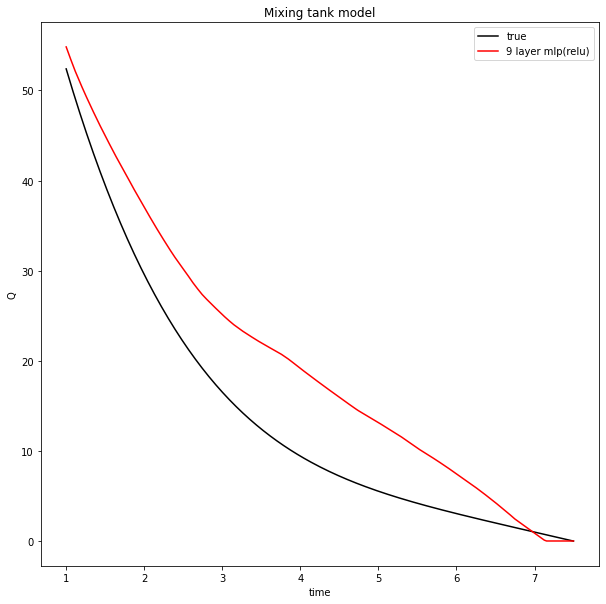

In [ ]:
X_test,Y_test=genData(min_t=1,max_t=30,min_ifr=7,min_ofr=9,min_iv=15,min_ic=6,num_data_points=1000,const_ifr=True,const_ofr=True,const_ifc=True,const_iv=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,5],Y_test,'k-',label='true')
plt.plot(X_test[:,5],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('time')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

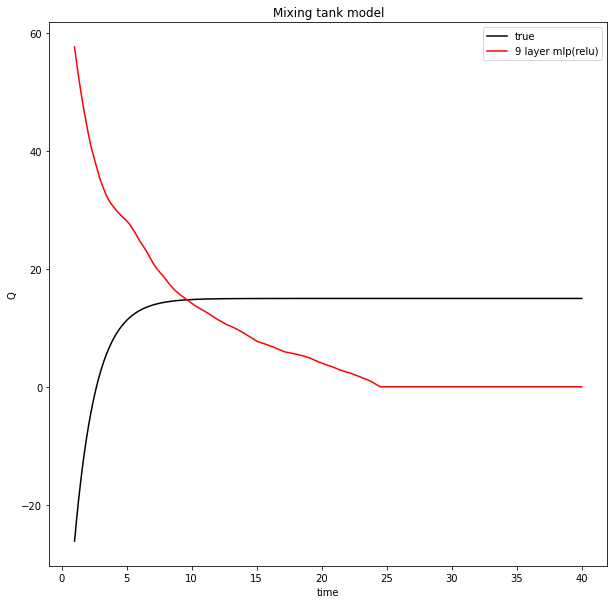

In [ ]:
X_test,Y_test=genData(min_t=1,max_t=40,min_ifr=9,min_ofr=9,min_iv=15,min_ic=6,num_data_points=1000,const_ifr=True,const_ofr=True,const_ifc=True,const_iv=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,5],Y_test,'k-',label='true')
plt.plot(X_test[:,5],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('time')
plt.ylabel('Q')
plt.legend()
plt.show()
#when ifr and ofr are nearly equal, it gives poor results for very t~0
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

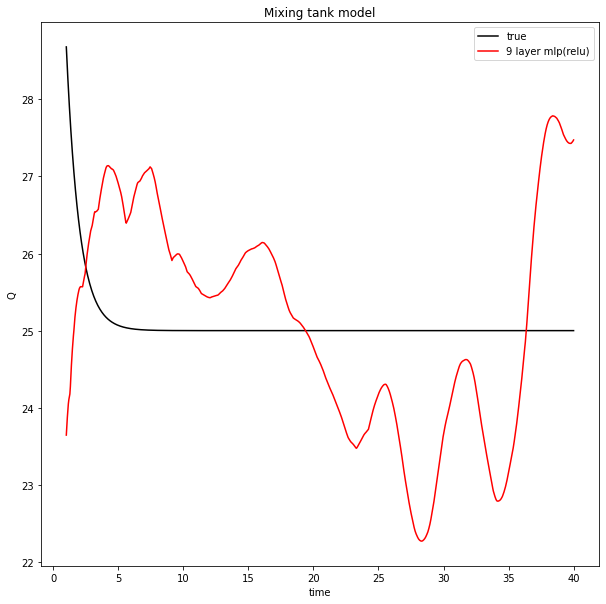

In [ ]:
X_test,Y_test=genData(min_t=1,max_t=40,min_ifr=5,min_ofr=5,min_iv=5,min_ic=3,min_ifc=5,num_data_points=1000,const_ifr=True,const_ofr=True,const_ifc=True,const_iv=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,5],Y_test,'k-',label='true')
plt.plot(X_test[:,5],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('time')
plt.ylabel('Q')
plt.legend()
plt.show()
#when ifr and ofr are nearly equal, it gives poor results for very t~0
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

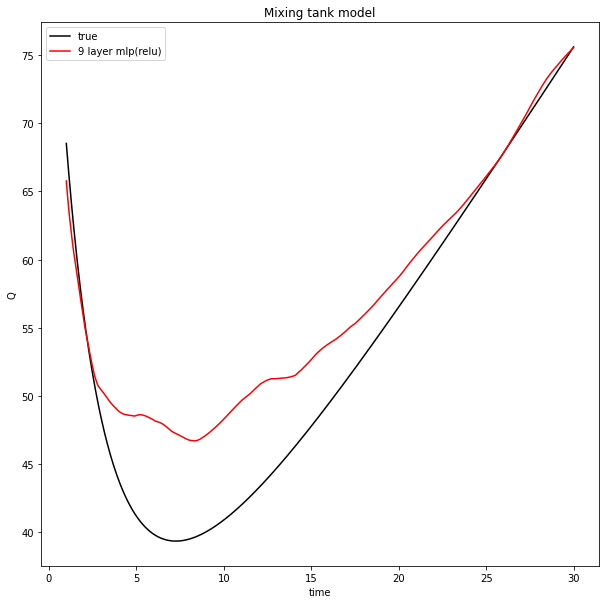

In [ ]:
X_test,Y_test=genData(min_t=1,max_t=30,min_ifr=8,min_ofr=6,min_iv=15,min_ic=6,num_data_points=1000,const_ifr=True,const_ofr=True,const_ifc=True,const_iv=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,5],Y_test,'k-',label='true')
plt.plot(X_test[:,5],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('time')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


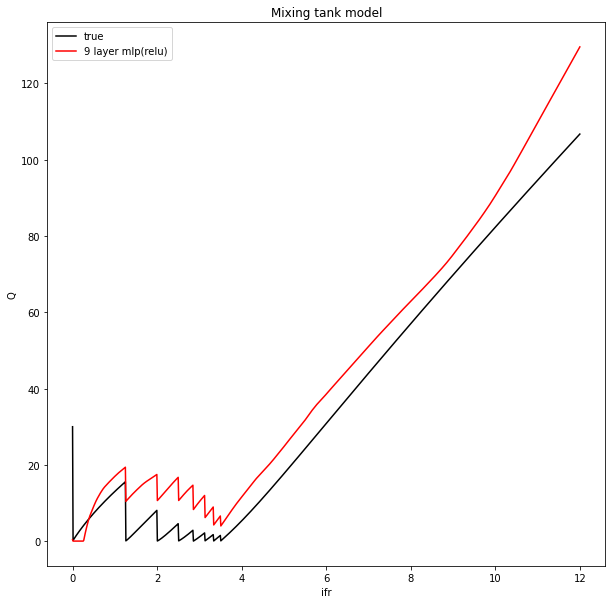

In [ ]:
X_test,Y_test=genData(min_t=10,min_ifr=0,max_ifr=12,min_ofr=5,min_iv=15,min_ic=6,num_data_points=1000,const_t=True,const_ofr=True,const_ifc=True,const_iv=True,const_ic=True,const_ifr=False,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,0],Y_test,'k-',label='true')
plt.plot(X_test[:,0],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('ifr')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

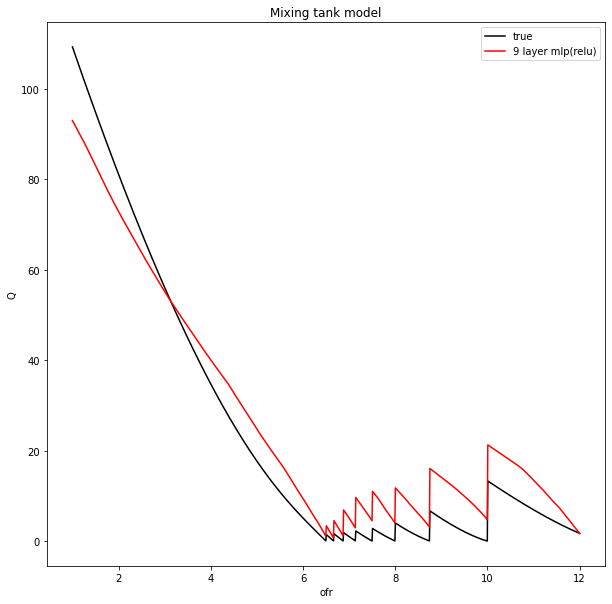

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=1,max_ofr=12,min_ifr=5,min_iv=15,min_ic=6,num_data_points=1000,const_t=True,const_ifr=True,const_ifc=True,const_iv=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,1],Y_test,'k-',label='true')
plt.plot(X_test[:,1],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('ofr')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

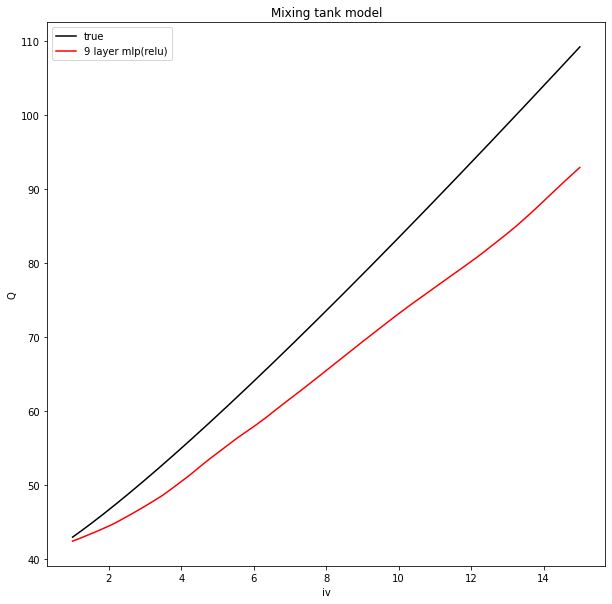

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=1,min_ifr=5,min_iv=1,max_iv=15,min_ic=6,num_data_points=1000,const_t=True,const_ifr=True,const_ifc=True,const_ofr=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,3],Y_test,'k-',label='true')
plt.plot(X_test[:,3],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('iv')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


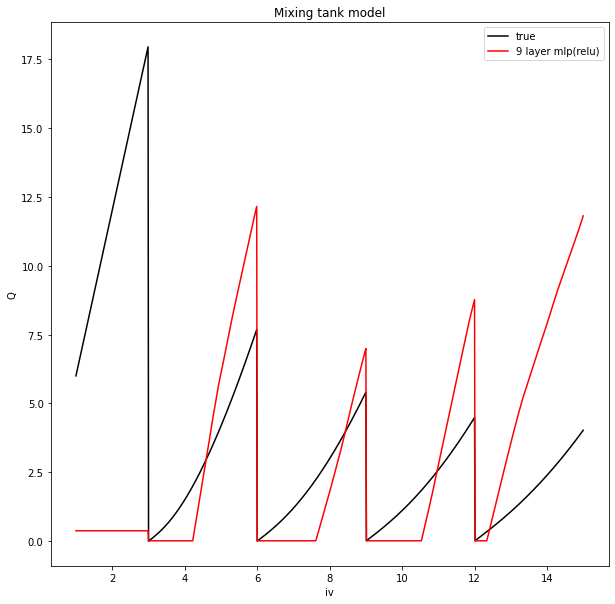

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=8,min_ifr=5,min_iv=1,max_iv=15,min_ic=6,num_data_points=1000,const_t=True,const_ifr=True,const_ifc=True,const_ofr=True,const_ic=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,3],Y_test,'k-',label='true')
plt.plot(X_test[:,3],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('iv')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

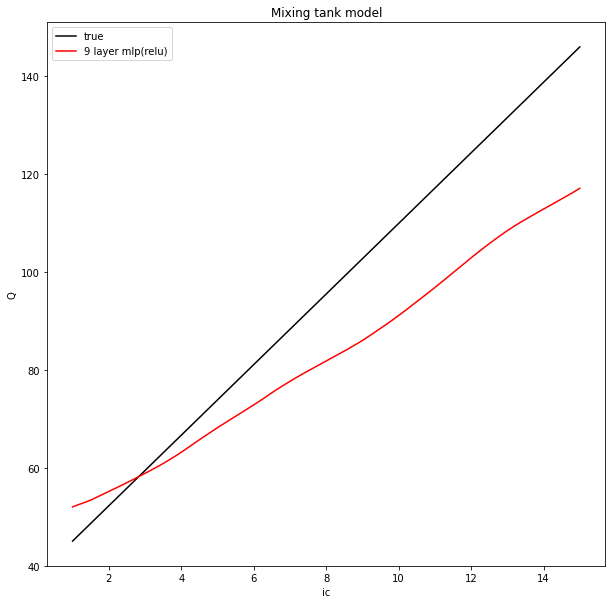

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=2,min_ifr=5,min_ic=1,max_ic=15,min_iv=15,num_data_points=1000,const_t=True,const_ifr=True,const_ifc=True,const_ofr=True,const_iv=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,4],Y_test,'k-',label='true')
plt.plot(X_test[:,4],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('ic')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

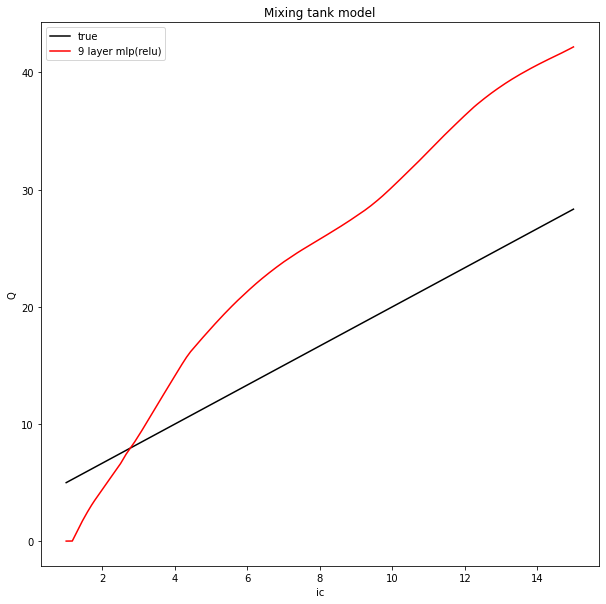

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=10,min_ifr=5,min_ic=1,max_ic=15,min_iv=15,num_data_points=1000,const_t=True,const_ifr=True,const_ifc=True,const_ofr=True,const_iv=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,4],Y_test,'k-',label='true')
plt.plot(X_test[:,4],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('ic')
plt.ylabel('Q')
plt.legend()
plt.show()
#poor performance when ofr > ifr . ic not prioritized ? 
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

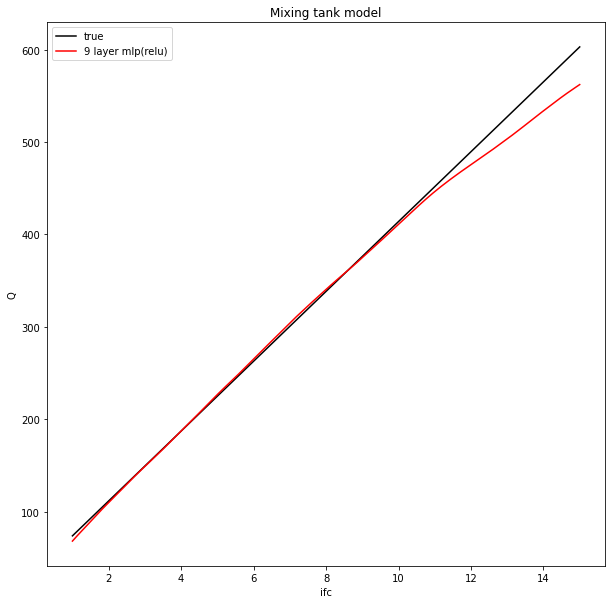

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=2,min_ifr=5,min_ifc=1,max_ifc=15,min_iv=15,min_ic=5,num_data_points=1000,const_t=True,const_ifr=True,const_ic=True,const_ofr=True,const_iv=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,2],Y_test,'k-',label='true')
plt.plot(X_test[:,2],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('ifc')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

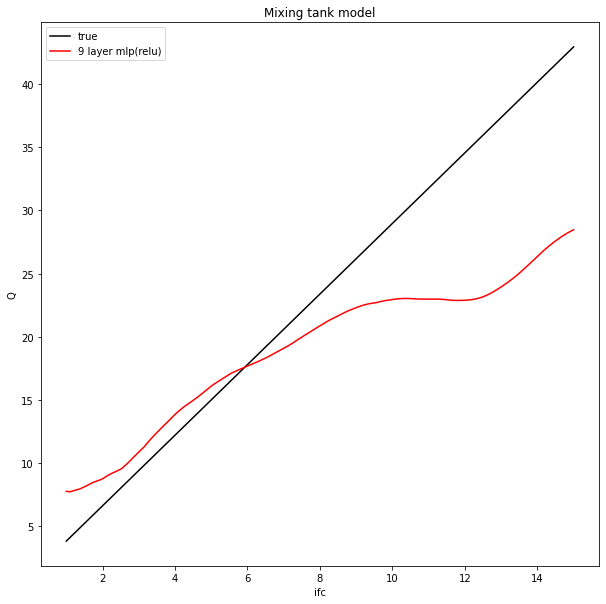

In [ ]:
X_test,Y_test=genData(min_t=10,min_ofr=8,min_ifr=5,min_ifc=1,max_ifc=15,min_iv=15,min_ic=5,num_data_points=1000,const_t=True,const_ifr=True,const_ic=True,const_ofr=True,const_iv=True,mode='uniform')
y_pred_test_nn=model.predict(X_test)
plt.rcParams["figure.figsize"]=(10,10)
plt.plot (X_test[:,2],Y_test,'k-',label='true')
plt.plot(X_test[:,2],y_pred_test_nn,'r-',label='9 layer mlp(relu)')
plt.title('Mixing tank model')
plt.xlabel('ifc')
plt.ylabel('Q')
plt.legend()
plt.show()
#needs more training on a smaller range 
#needs more training examples where ifr is nearly 0 

**Generally the model appears to be performing better when ifr > ofr**

In [ ]:
model.save("drive/My Drive/modelsopifrofrt.h5")
model.save_weights("drive/My Drive/modelsopweightsifrofrt.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
X_test,Y_test=genData(min_t=1,max_t=30,min_ifr=7,min_ofr=9,min_iv=15,min_ic=6,num_data_points=1000,mode='random')
y_pred_test_nn=model.predict(X_test)
print (metrics.mean_absolute_error(Y_test,y_pred_test_nn))

4.198859018841663


**Training a neural network for the inverse learning problem. Here the y value becomes the input and the x value becomes the corresponding output.**<br>
Note: There can be multiple values of x for the same given value of y. This neural network will output only one value at a time. Further, this neural network does not allow us to enter some known inputs. All that it can do is predict one possible vector X for a given y

In [ ]:
inv_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=4096,input_shape=(1000000,1),activation='relu'), 
    tf.keras.layers.Dense(units=2048,activation='relu'), 
    tf.keras.layers.Dense(units=1024,activation='relu'), 
    tf.keras.layers.Dense(units=512,activation='relu'), 
    tf.keras.layers.Dense(units=256,activation='relu'), 
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=8,activation='relu'), 
    tf.keras.layers.Dense(units=6,activation='relu')
])
inv_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mse'],loss='mean_squared_error')

In [ ]:
inv_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['mse'],loss='mean_squared_error')
inv_model.fit(Y_train,X_train,verbose=1,epochs=200,batch_size=10000)

Epoch 1/2
100/100 [==============================] - 41s 380ms/step - loss: 18.9536 - mse: 18.9536
Epoch 2/2
100/100 [==============================] - 38s 378ms/step - loss: 18.9534 - mse: 18.9534


In [ ]:
inv_model.save("drive/My Drive/invmodelsop.h5")
inv_model.save_weights("drive/My Drive/invmodelsopweights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
loaded_model=tf.keras.models.load_model("drive/My Drive/modelsopifrofr.h5")
loaded_model.load_weights("drive/My Drive/modelsopweightsifrofr.h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:
model=loaded_model

**Testing the model by predicting input X on a given y**

In [ ]:
X_test,Y_test=genData(min_t=1,max_t=30,min_ifr=7,min_ofr=9,min_iv=15,min_ic=6,num_data_points=1000,mode='random')
x_pred_test_nn=inv_model.predict(Y_test)
x_pred_test_nn=x_pred_test_nn.reshape(1000,6)

In [ ]:
print (metrics.mean_absolute_error(X_test,x_pred_test_nn))

4.043322411227934


**Running the neural network which predicts y given X on the X values generated by the inverse neural network to test performance**

In [ ]:
#running the forward model on the inverse obtained
y_pred_test_nn=loaded_model.predict(x_pred_test_nn)
print (metrics.mean_absolute_error(Y_test,y_pred_test_nn))

30.93475855973477


In [ ]:
print (x_pred_test_nn)


[[5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]
 [5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]
 [5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]
 ...
 [5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]
 [5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]
 [5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]]


As seen above the inverse neural network does not perform well at all despite giving it a complex architecture with a large number of data points. It predicts the same X values no matter what the given value of y is. It was expected that for a given y, x will be the same (despite the fact that there might be multiple x values for the same y). But this neural network is doing neither and is just predicting the same X irrespective of y

**Using the gradient approach to model the inverse learning problem ie., we have the forward neural network that predicts y given x. We now give this neural network a target output value y. We also have the advantage of now being able to specify inputs x which are known and unknown**<br>

Algorithm:<br>
1. Find $\dfrac{d Cost(y_{true},y_{pred})}{dx}$ where $y_{pred}$ is $NN(x)$ and $NN(x)$ is the neural network that predicts $y$ given $x$<br> 
2. Update $x$ as $x = x - \eta*\dfrac{d Cost(y_{true},y_{pred})}{dx}$ where $\eta$ is the learning rate parameter<br>
3. Repeat this process till convergence


Demonstrated below is an example of using the gradient approach wheree some of the inputs are known

In [ ]:
print ("Enter known inputs, -1 for unknown in the following order: ifr,ofr,ifc,ic,iv")
grad_mask=[]
X_input=[]
print ("ifr:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("ofr:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("ifc:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  X_input.append(x)
  grad_mask.append(1)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("iv:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  X_input.append(x)
  grad_mask.append(1)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("ic:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("t:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)

X_input=np.array(X_input)
for i in range(36):
  grad_mask.append(0)
grad_mask=np.array(grad_mask)



X_input_mod,Y_input_mod=genData(min_ifr=X_input[0],min_ofr=X_input[1],min_ifc=X_input[2],min_iv=X_input[3],min_ic=X_input[4],min_t=X_input[5],const_ic=True,const_ifc=True,const_ifr=True,const_iv=True,const_ofr=True,const_t=True,num_data_points=1)
X_input_og=np.copy(X_input_mod)
print (X_input_og)

Enter known inputs, -1 for unknown in the following order: ifr,ofr,ifc,ic,iv
ifr:
5
ofr:
3
ifc:
-1
ic:
6
iv:
-1
t:
7
[[5.         3.         5.6233796  6.         8.41295001 7.        ]]


In [ ]:
#Run this cell only if you run into exploding gradient issues. This is to retrive the value of x back
X_input_mod=np.copy(X_input_og)
print (X_input_mod)

In [ ]:
#current prediction 
loaded_model.predict(X_input_mod)

array([[113.44354]], dtype=float32)

In [ ]:
print("Enter final target prediction:")
y_final=input()
y_final=float(y_final)

Enter final target prediction:
64.35


In [ ]:
#this cell is for actually calculating the value of X from y by following the algorithm shown above
epochs=1000
learning_rate=0.0001
for i  in range(epochs):
  x_test_tensor=k.constant(X_input_mod)
  with tf.GradientTape() as gtape:
    gtape.watch(x_test_tensor)
    y_out=loaded_model(x_test_tensor)

    loss=tf.keras.losses.mean_squared_error(y_out,y_final)
    grads=gtape.gradient(loss,x_test_tensor)

  gnp=grads.numpy()
  gnp=gnp*grad_mask

  X_input_mod=X_input_mod - learning_rate*gnp
  X_input_mod,Y_input_mod=genData(min_ifr=X_input_mod[0][0],min_ofr=X_input_mod[0][1],min_ifc=X_input_mod[0][2],min_ic=X_input_mod[0][3],min_iv=X_input_mod[0][4],min_t=X_input_mod[0][5],const_ic=True,const_ifc=True,const_ifr=True,const_iv=True,const_ofr=True,const_t=True,num_data_points=1)



print (X_input)
print (X_input_og)
print(y_final)
loaded_model.predict(X_input_mod)

[[5.         3.         2.90717163 6.         8.28611009 7.        ]]
[[5.         3.         5.6233796  6.         8.41295001 7.        ]]
64.35


array([[64.350006]], dtype=float32)

In the above cell, the first line represents the model predictions for the parameters given the targer variable output and the second line represents the random initialization it started with. The third line represents the actual target output and the 4th line represents the predicted target output. If we run the inverse neural network on this y value, we will get a completely different set of X parameters as shown below. Note that this value x will not change at all for a fixed y

In [ ]:
y_final=np.array([y_final])
y_final=y_final.reshape((1,1))
x_out_y=inv_model.predict(y_final)
print (x_out_y)

[[[5.002582  5.5052443 5.5018806 5.4974265 5.4997187 8.475044 ]]]


The above algorithm can also handle cases where no inputs are known as demonstrated below. In such a case, using the gradient approach will give different values based on random initialization

In [ ]:
print ("Enter known inputs, -1 for unknown in the following order: ifr,ofr,ifc,ic,iv")
grad_mask=[]
X_input=[]
print ("ifr:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("ofr:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("ifc:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  X_input.append(x)
  grad_mask.append(1)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("iv:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  X_input.append(x)
  grad_mask.append(1)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("ic:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)
print ("t:")
x=input()
x=float(x)
if (x<0):
  x=np.random.uniform(1,10)
  grad_mask.append(1)
  X_input.append(x)
else:
  X_input.append(x)
  grad_mask.append(0)

X_input=np.array(X_input)
for i in range(36):
  grad_mask.append(0)
grad_mask=np.array(grad_mask)



X_input_mod,Y_input_mod=genData(min_ifr=X_input[0],min_ofr=X_input[1],min_ifc=X_input[2],min_iv=X_input[3],min_ic=X_input[4],min_t=X_input[5],const_ic=True,const_ifc=True,const_ifr=True,const_iv=True,const_ofr=True,const_t=True,num_data_points=1)
X_input_og=np.copy(X_input_mod)
print (X_input_og)

Enter known inputs, -1 for unknown in the following order: ifr,ofr,ifc,ic,iv
ifr:
-1
ofr:
-1
ifc:
-1
ic:
-1
iv:
-1
t:
-1
[[5.86692342 4.66827262 3.38536115 9.45484807 8.88337501 1.68959326]]


In [ ]:
#current prediction 
print (loaded_model.predict(X_input_mod))
print("Enter final target prediction:")
y_final=input()
y_final=float(y_final)

[[62.421513]]
Enter final target prediction:
100.41


In [ ]:
#this cell is for actually calculating the value of X from y by following the algorithm shown above
epochs=1000
learning_rate=0.0001
for i  in range(epochs):
  x_test_tensor=k.constant(X_input_mod)
  with tf.GradientTape() as gtape:
    gtape.watch(x_test_tensor)
    y_out=loaded_model(x_test_tensor)

    loss=tf.keras.losses.mean_squared_error(y_out,y_final)
    grads=gtape.gradient(loss,x_test_tensor)

  gnp=grads.numpy()
  gnp=gnp*grad_mask

  X_input_mod=X_input_mod - learning_rate*gnp
  X_input_mod,Y_input_mod=genData(min_ifr=X_input_mod[0][0],min_ofr=X_input_mod[0][1],min_ifc=X_input_mod[0][2],min_ic=X_input_mod[0][3],min_iv=X_input_mod[0][4],min_t=X_input_mod[0][5],const_ic=True,const_ifc=True,const_ifr=True,const_iv=True,const_ofr=True,const_t=True,num_data_points=1)



print ("Prediction:",X_input_mod)
print ("Random init:",X_input_og)
print("target:",y_final)
print("Predicted target on the new input:",loaded_model.predict(X_input_mod))


Prediction: [[ 6.2086757   4.17524219  3.31224484 10.91005591 10.2008448   0.51766145]]
Random init: [[5.86692342 4.66827262 3.38536115 9.45484807 8.88337501 1.68959326]]
100.41


array([[100.41]], dtype=float32)

In [ ]:
y_final=np.array([y_final])
y_final=y_final.reshape((1,1))
x_inv_net=inv_model.predict(y_final)
print("Prediction of X values using the inverse neural network:",x_inv_net)


Prediction of X values using the inverse neural network: [[[5.0016494 5.5015936 5.501593  5.4971952 5.5003667 8.476021 ]]]


In [ ]:

x_inv_net=x_inv_net.reshape((1,6))
print (x_inv_net.shape)
loaded_model.predict(x_inv_net)

(1, 6)


array([[0.16101469]], dtype=float32)

As seen above, the inverse neural network gives a completely different answer from the forward neural network with the gradient approach. Further, this is completely wrong as passing that output to the forward function again gives a value which is completely off (100.41 true value vs 0.16 predicted value).<br> <br>Note that the forward neural network isn't perfect, but it is a reasonable approximation of such a complex function as is seen in the graphs above. Using the gradient approach naturally makes the model fit the X values perfectly to the output of the model. There will be some inherent error in these values due to the approximation of the neural network itself. As a result, if these were the actual X values, the true Y values that we obtain from the differential equation will be slightly different. However, the gradient approach still is a reasonable thing to do because the neural network does approximate the function fairly well.<br><br>
In contrast, the inverse neural network has clearly learnt nothing meaningful despite having such a large amount of data and a complex architecture.<br><br> The gradient approach has the following advantages:
1. We need only a single forward model to predict Y given X and X given Y
2. We can get multiple values of X for the same value of Y based on random initialization
3. We can either provide just Y and the model can predict X or we can give some known values in the vector X and the model can predict the remaining elements in the vector

Therefore, the gradient based approach to model the inverse learning problem is superior to the neural network based approach for the inverse learning problem based on the architecture shown in this notebook